Scenario 1

In [99]:
# LOHITH V P 24BAD064
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [100]:
# LOHITH V P 24BAD064
df = pd.read_csv("spam.csv", encoding="latin-1")
df = df[['v1','v2']]
df.columns = ['label','message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [101]:
# LOHITH V P 24BAD064
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [102]:
# LOHITH V P 24BAD064
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_message'] = df['message'].apply(clean_text)

In [103]:
# LOHITH V P 24BAD064
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [104]:
# LOHITH V P 24BAD064
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_message'])
y = df['label']

In [105]:
# LOHITH V P 24BAD064
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

In [106]:
# LOHITH V P 24BAD064
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

MultinomialNB()

In [107]:
# LOHITH V P 24BAD064
y_pred = model.predict(X_test)

In [108]:
# LOHITH V P 24BAD064
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9632286995515695
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       953
           1       1.00      0.75      0.86       162

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.96      0.96      0.96      1115



In [110]:
# LOHITH V P 24BAD064
misclassified = df.iloc[y_test.index][y_test != y_pred]
misclassified.head()

,label,message,clean_message
2268,1,88066 FROM 88066 LOST 3POUND HELP,from lost pound help
5214,1,Natalja (25/F) is inviting you to be her frien...,natalja f is inviting you to be her friend rep...
606,1,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,xclusiveclubsaisai morow soiree speciale zouk...
226,1,Will u meet ur dream partner soon? Is ur caree...,will u meet ur dream partner soon is ur career...
164,1,BangBabes Ur order is on the way. U SHOULD rec...,bangbabes ur order is on the way u should rece...


In [ ]:
# LOHITH V P 24BAD064
alphas = [0.1, 0.5, 1, 2, 5]
for a in alphas:
    m = MultinomialNB(alpha=a)
    m.fit(X_train, y_train)
    p = m.predict(X_test)
    print(a, accuracy_score(y_test, p))

0.1 0.9739910313901345
0.5 0.9739910313901345
1 0.9632286995515695
2 0.9354260089686098
5 0.8771300448430494


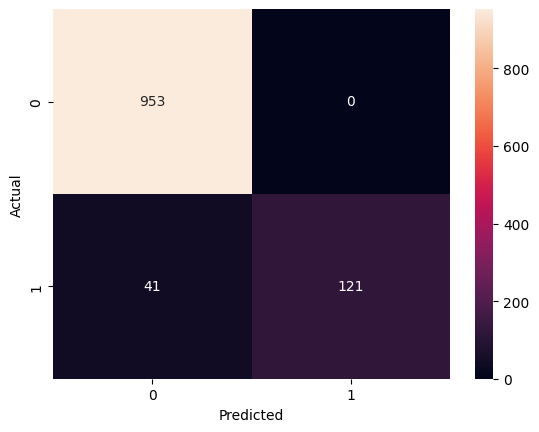

In [ ]:
# LOHITH V P 24BAD064
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# LOHITH V P 24BAD064
feature_names = np.array(vectorizer.get_feature_names_out())
spam_words = feature_names[model.feature_log_prob_[1].argsort()[-20:]]
spam_words

array(['send', 'customer', 'guaranteed', 'win', 'nokia', 'service',
       'cash', 'new', 'contact', 'urgent', 'won', 'reply', 'ur', 'stop',
       'prize', 'text', 'mobile', 'claim', 'txt', 'free'], dtype=object)

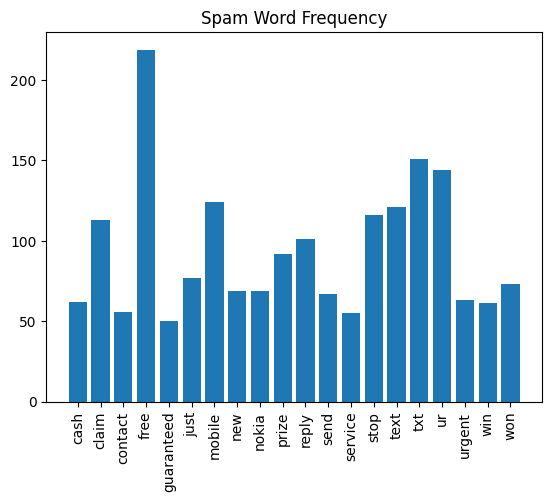

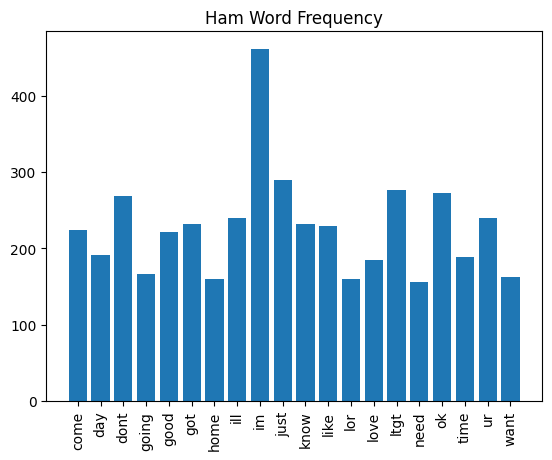

In [ ]:
# LOHITH V P 24BAD064
spam_text = df[df['label']==1]['clean_message']
ham_text = df[df['label']==0]['clean_message']

spam_vec = CountVectorizer(stop_words='english', max_features=20)
ham_vec = CountVectorizer(stop_words='english', max_features=20)

spam_counts = spam_vec.fit_transform(spam_text).sum(axis=0)
ham_counts = ham_vec.fit_transform(ham_text).sum(axis=0)

plt.bar(spam_vec.get_feature_names_out(), np.array(spam_counts)[0])
plt.xticks(rotation=90)
plt.title("Spam Word Frequency")
plt.show()

plt.bar(ham_vec.get_feature_names_out(), np.array(ham_counts)[0])
plt.xticks(rotation=90)
plt.title("Ham Word Frequency")
plt.show()

Scenario 2

In [ ]:
# LOHITH V P 24BAD064
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# LOHITH V P 24BAD064
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# LOHITH V P 24BAD064
pd.DataFrame(X, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# LOHITH V P 24BAD064
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

In [ ]:
# LOHITH V P 24BAD064
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# LOHITH V P 24BAD064
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# LOHITH V P 24BAD064
y_pred = gnb.predict(X_test)

In [ ]:
# LOHITH V P 24BAD064
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
# LOHITH V P 24BAD064
pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).head()

,Actual,Predicted
0,2,2
1,2,2
2,0,0
3,0,0
4,0,0


In [ ]:
# LOHITH V P 24BAD064
gnb.predict_proba(X_test)[:5]

array([[3.00621867e-237, 4.79506440e-007, 9.99999520e-001],
       [1.79590650e-212, 1.34293199e-006, 9.99998657e-001],
       [1.00000000e+000, 1.09445435e-019, 2.28587553e-027],
       [1.00000000e+000, 8.52785104e-018, 6.56805302e-026],
       [1.00000000e+000, 9.75880846e-014, 1.14019054e-021]])

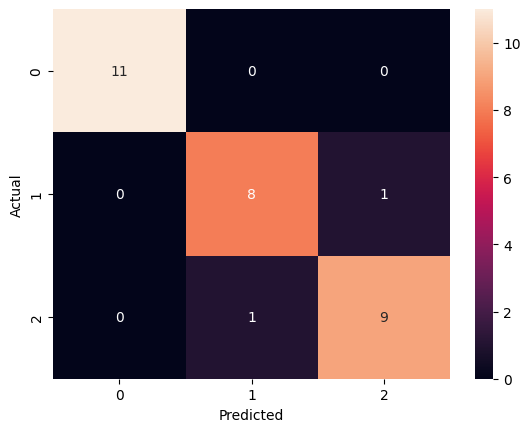

In [ ]:
# LOHITH V P 24BAD064
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

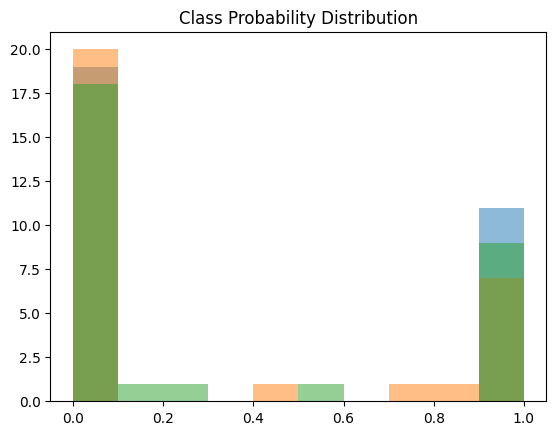

In [ ]:
# LOHITH V P 24BAD064
probs = gnb.predict_proba(X_test)
plt.hist(probs[:,0], alpha=0.5)
plt.hist(probs[:,1], alpha=0.5)
plt.hist(probs[:,2], alpha=0.5)
plt.title("Class Probability Distribution")
plt.show()

In [ ]:
# LOHITH V P 24BAD064
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.9
